### Random Walk Generation

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import analysis_kit as ak

In [4]:

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100): 
    """
    Evolution of a stock price using a geometric brownian motion model
    
    n_years= Total number of years that you want to generate returns. It answers the question of how long?
    n_scenarios= How many scenarios you wanna generate ? Answers the question of how many?
    steps_per_year= The "dt" in the Return process model; It is a delta time/ microstep and we gonna generate random numbers
                    at every step of the way. So, essentially, we are moving the time forward one microstep and generating a 
                    stock return. It answers the question of how many steps do you want to move forward per year?
    s_0= Asset price at t=0
    
    """
    
    dt=1/steps_per_year # Amount by which I should change the time as I am generating these random prices. Note that this is 
                        # not the same as "steps_per_year" mentioned above. The "steps_per_year" gives the number of times you
                        # have to change the dt
                        # But the "dt" in itself is the AMOUNT by which the dt is changed at every microstep
                
    total_steps=int(steps_per_year * n_years)
    
    psi=np.random.normal(size=(total_steps,n_scenarios)) # we are generating a matrix or an array which is as many rows as total
                                                    # steps and as many columns as n_scenarios
                        # Think of this as generating a table where each row is a new return and a new stock price and every
                        # column is a possible scenario
    
    rets= (mu * dt) + (sigma * np.sqrt(dt) * psi)
    
    
    # If we were generating returns, the above steps would have been enough. But remember that we are generating stock prices
    # right now. So, we gotta convert these returns to prices.
    
    rets=pd.DataFrame(rets) # converting the rets series to a df
    
    prices= s_0 * (1+rets).cumprod()
    
    return prices

In [34]:
p=gbm(10, n_scenarios=3)

In [35]:
p # The columns of this df is showing us how a stock price would behave in different scenarios. The rows are resembling the 
    # steps or interval at which the time changes

,0,1,2
0,103.086392,102.139716,94.040615
1,102.262842,108.799888,84.975202
2,104.755883,118.235449,89.259716
3,106.313931,119.676722,92.783226
4,106.712957,118.072380,99.356111
...,...,...,...
115,116.258430,96.537621,95.949687
116,113.677364,89.401101,99.915703
117,107.559920,88.445906,100.662954
118,98.066041,86.813184,101.680100


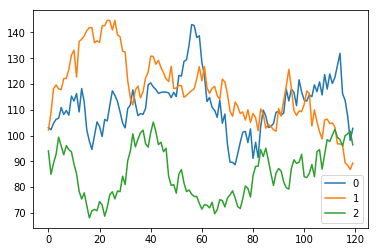

In [36]:
p.plot()

In [19]:
#############################################################################################################################

In [22]:
p=gbm(n_years=10, n_scenarios=1000) #.plot(figsize=(12,6), legend=False)

# This shows that plotting is way slower compared to generating large set of random numbers

Since we want the random number generators to run as fast as possible, lets modify the code above so that it becomes a bit more efficient

In [41]:
def gbm_fast(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):

    dt=1/steps_per_year
    total_steps=int(steps_per_year * n_years)
    rets_plus_1= np.random.normal(loc=(1 + mu * dt), scale=(sigma * np.sqrt(dt)), size=(total_steps, n_scenarios))
    rets_plus_1[0]=1
    # to prices
    prices=s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [45]:
gbm_fast(n_years=10, n_scenarios=20).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,104.216814,100.462305,101.804480,100.196800,101.302595,100.417559,105.237980,100.370547,104.734934,102.604443,96.507959,101.610232,98.426998,97.654436,102.003173,103.254177,97.809941,100.198416,98.521081,101.694327
2,106.539908,106.656214,105.277688,102.904272,106.708902,104.331259,103.328940,96.866689,111.852133,100.487217,100.600124,106.106834,102.441050,105.599633,103.253187,109.870327,94.402210,102.333620,95.460321,103.165310
3,97.806925,107.549428,105.624357,99.252454,106.668989,106.564737,101.363909,97.864715,104.444426,104.338055,103.858540,112.486877,93.763887,105.473761,103.081676,105.626630,97.077318,101.886825,101.970003,101.958396
4,100.218520,105.957975,105.803487,92.746186,99.103723,106.065505,98.757796,103.383438,102.136110,106.162394,101.385866,112.676231,88.704053,100.628556,104.366959,109.590269,94.335433,104.295595,101.312489,101.337866


### Lets plot the fast one

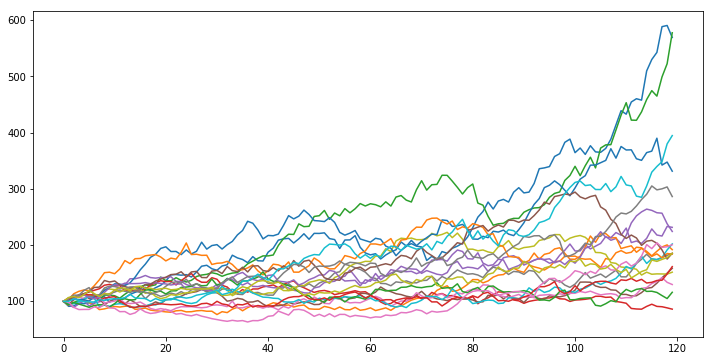

In [44]:
gbm_fast(n_years=10, n_scenarios=20).plot(figsize=(12,6), legend=False)